## Read Dataset

讀入資料集

In [2]:
# Copy datasets on the drive to the tmp folder
!gdown --id '1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh' --output /tmp/MidTerm_Dataset.zip

import os
import zipfile

# Unzip
local_zip = '/tmp/MidTerm_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qCHfycy91EyUFzilBvxu8hYVYp0l6jCh
To: /tmp/MidTerm_Dataset.zip
100% 50.4M/50.4M [00:00<00:00, 201MB/s]


確認雲端的資料夾是否存在資料集

In [3]:
# Check files extracted with ls
!ls /tmp/MidTerm_Dataset

Test  Train


## Data Preprocessing

統一輸進之資料格式大小

In [4]:
# Define input shape of the data
input_shape = (224, 224, 3)

資料前處理

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    brightness_range=[0.5, 1.5],
                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/tmp/MidTerm_Dataset/Train',
                             target_size=input_shape[:2],
                             batch_size=32,
                             class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/tmp/MidTerm_Dataset/Test',
                                target_size=input_shape[:2],
                                batch_size=1,
                                class_mode='categorical',
                                shuffle=False)

Found 6092 images belonging to 4 classes.
Found 1524 images belonging to 4 classes.


## Model

**Define model architecture** 

模型加入池化層可多次，此重複四次

使用summary顯示模型概覽

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 4

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

**Model compiltion**

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Model Training**

In [9]:
history = model.fit(train_generator,
              steps_per_epoch=train_generator.n//train_generator.batch_size,
              epochs=30,
              validation_data=validation_generator,
              validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/30
190/190 [==============================] - 97s 449ms/step - loss: 1.3755 - accuracy: 0.2970 - val_loss: 1.1008 - val_accuracy: 0.5315
Epoch 2/30
190/190 [==============================] - 84s 444ms/step - loss: 0.8327 - accuracy: 0.6312 - val_loss: 0.6066 - val_accuracy: 0.7513
Epoch 3/30
190/190 [==============================] - 84s 444ms/step - loss: 0.5999 - accuracy: 0.7477 - val_loss: 0.4483 - val_accuracy: 0.8248
Epoch 4/30
190/190 [==============================] - 84s 442ms/step - loss: 0.5348 - accuracy: 0.7757 - val_loss: 0.4048 - val_accuracy: 0.8222
Epoch 5/30
190/190 [==============================] - 86s 453ms/step - loss: 0.4873 - accuracy: 0.8007 - val_loss: 0.3930 - val_accuracy: 0.8392
Epoch 6/30
190/190 [==============================] - 85s 446ms/step - loss: 0.4785 - accuracy: 0.8058 - val_loss: 0.4317 - val_accuracy: 0.8143
Epoch 7/30
190/190 [==============================] - 85s 447ms/step - loss: 0.4331 - accuracy: 0.8211 - val_loss: 0.4462 - val_ac

**Plot accuracy of traning and validation**

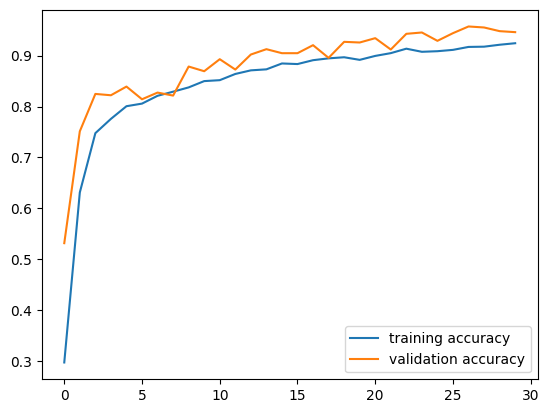

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**Plot loss of traning and validation**

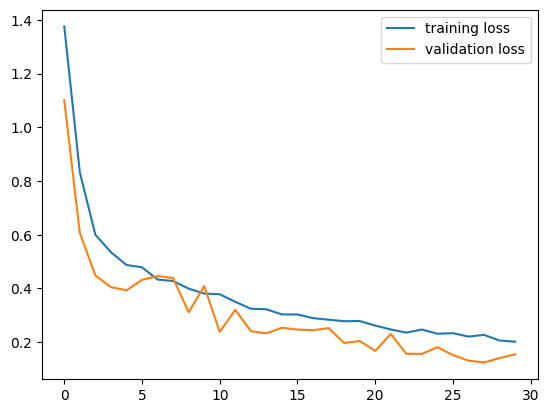

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

**Test accuracy and Test loss**

印出Test accuracy

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

1524/1524 - 6s - loss: 0.1548 - accuracy: 0.9462 - 6s/epoch - 4ms/step
Test accuracy: 0.9461942315101624


印出Test loss

In [13]:
# Evaluate the model on the test set
print('Test loss:', test_loss)

Test loss: 0.15475043654441833


## Make A Prediction by Giving A Picture

In [ ]:
# make a prediction on a new image
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/tmp/' + fn
    img = load_img(path, target_size=(224, 224))

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #images = np.vstack([x])
    classes = model.predict(x)

    class_names = ['Bolt', 'Locating Pin', 'Nut', 'Washer']
    predicted_class = class_names[np.argmax(classes)]
    confidence = np.max(classes)

    print(f"{fn} is a {predicted_class} with confidence {confidence:.2f}")

Saving 327.png to 327.png
1/1 [==============================] - 0s 20ms/step
327.png is a Bolt with confidence 1.00


## 其他工作區